## Observations and Insights 

In [1722]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pymaceutical_df = pd.merge(mouse_metadata_df, study_results_df, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview


In [1723]:
pymaceutical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Mouse ID             1893 non-null   object 
 1   Drug Regimen         1893 non-null   object 
 2   Sex                  1893 non-null   object 
 3   Age_months           1893 non-null   int64  
 4   Weight (g)           1893 non-null   int64  
 5   Timepoint            1893 non-null   int64  
 6   Tumour Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites     1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [1724]:
pymaceutical_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumour Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [1725]:
mice_count = len(pymaceutical_df["Mouse ID"].unique())
mice_count

249

In [1726]:
pymaceutical_df["Mouse ID"].nunique()

249

In [1727]:
# Checking the number of mice.
pymaceutical_df["Mouse ID"]

0       k403
1       k403
2       k403
3       k403
4       k403
        ... 
1888    z969
1889    z969
1890    z969
1891    z969
1892    z969
Name: Mouse ID, Length: 1893, dtype: object

In [1728]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_df=pymaceutical_df.loc[pymaceutical_df.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicated_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [1729]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_subset_df=pymaceutical_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
data_subset_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [1730]:
# Checking the number of mice in the clean DataFrame.
data_subset_df["Mouse ID"].count()

1888

In [1731]:
data_subset_df["Mouse ID"].nunique()

249

## Summary Statistics

In [1732]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.

In [1733]:
data_subset_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumour Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [1734]:
data_subset_df["Drug Regimen"].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [1735]:
summary_statistic_start_df= data_subset_df[["Drug Regimen","Tumour Volume (mm3)"]]
summary_statistic_start_df.info

<bound method DataFrame.info of      Drug Regimen  Tumour Volume (mm3)
0        Ramicane            45.000000
1        Ramicane            38.825898
2        Ramicane            35.014271
3        Ramicane            34.223992
4        Ramicane            32.997729
...           ...                  ...
1888     Naftisol            63.145652
1889     Naftisol            65.841013
1890     Naftisol            69.176246
1891     Naftisol            70.314904
1892     Naftisol            73.867845

[1888 rows x 2 columns]>

In [1736]:
summary_statistics_group_df = summary_statistic_start_df.groupby(["Drug Regimen"])
summary_statistics_group_df

In [1737]:
mean_df = summary_statistics_group_df.mean()
mean_df = mean_df.rename(columns={"Tumour Volume (mm3)":"Mean Tumour Volume"})
mean_df

,Mean Tumour Volume
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.393463
Ramicane,40.216745
Stelasyn,54.233149


In [1738]:
median_df =summary_statistics_group_df.median()
median_df = median_df.rename(columns={"Tumour Volume (mm3)":"Median Tumour Volume"})
median_df

,Median Tumour Volume
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.909965
Ramicane,40.673236
Stelasyn,52.431737


In [1739]:
variance_df = summary_statistics_group_df.var()
variance_df = variance_df.rename(columns={"Tumour Volume (mm3)":"Tumour Volume Variance"})
variance_df

,Tumour Volume Variance
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,43.138803
Ramicane,23.486704
Stelasyn,59.450562


In [1740]:
std_df = summary_statistics_group_df.std()
std_df = std_df.rename(columns={"Tumour Volume (mm3)":"Tumour Volume Std. Dev."})
std_df

,Tumour Volume Std. Dev.
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.568014
Ramicane,4.846308
Stelasyn,7.710419


In [1741]:
SEM_df = summary_statistics_group_df.sem()
SEM_df = SEM_df.rename(columns={"Tumour Volume (mm3)":"Tumour Volume Std. Err."})
SEM_df

,Tumour Volume Std. Err.
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.525862
Ramicane,0.320955
Stelasyn,0.573111


In [1742]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
summary_statistics_df = pd.DataFrame({"Mean Tumour Volume":mean_df["Mean Tumour Volume"],
                              "Median Tumour Volume":median_df["Median Tumour Volume"],
                              "Tumour Volume Variance":variance_df["Tumour Volume Variance"],
                              "Tumour Volume Std. Dev.":std_df["Tumour Volume Std. Dev."],
                              "Tumour Volume Std. Err.":SEM_df["Tumour Volume Std. Err."]})
summary_statistics_df

,Mean Tumour Volume,Median Tumour Volume,Tumour Volume Variance,Tumour Volume Std. Dev.,Tumour Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [1743]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_table_df = pymaceutical_df.groupby("Drug Regimen").agg({"Tumour Volume (mm3)":["mean","median","var","std","sem"]})
summary_table_df

Tumour Volume (mm3)                                          
                            mean     median        var       std       sem
Drug Regimen                                                              
Capomulin              40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin               52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol              52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril               55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol               54.331565  52.509285  66.173479  8.134708  0.596466
Placebo                54.033581  52.288934  61.168083  7.821003  0.581331
Propriva               52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane               40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn               54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol              53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [1744]:
data_subset_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumour Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [1745]:
data_subset_df["Drug Regimen"].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [1746]:
bar_df= data_subset_df[["Drug Regimen", "Timepoint"]]
bar_df

,Drug Regimen,Timepoint
0,Ramicane,0
1,Ramicane,5
2,Ramicane,10
3,Ramicane,15
4,Ramicane,20
...,...,...
1888,Naftisol,25
1889,Naftisol,30
1890,Naftisol,35
1891,Naftisol,40


In [1747]:
bar_subset_df = bar_df.groupby(["Drug Regimen"])
bar_subset_df

In [1748]:
timepoints = bar_subset_df["Timepoint"].count()
timepoints

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

In [1749]:
total_timepoints_df = pd.DataFrame(timepoints)
total_timepoints_df

,Timepoint
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,156
Ramicane,228
Stelasyn,181


In [1750]:
drug_regimen = list(total_timepoints_df.index.values)
drug_regimen

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [1751]:
list(total_timepoints_df["Timepoint"])

[230, 178, 178, 188, 186, 181, 156, 228, 181, 182]

In [1752]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.


In [1753]:
drug_regimen = ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
total_no_timepoints = [230, 178, 178, 188, 186, 181, 156, 228, 181, 182]
x_axis = np.arange(len(drug_regimen))

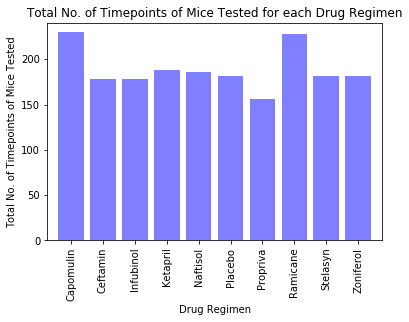

In [1754]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(drug_regimen, total_no_timepoints, color='b', alpha=0.5, align="center")
plt.xticks(rotation='vertical')
plt.xlim(-0.75, len(drug_regimen)-0.25)
plt.ylim(0, max(total_no_timepoints)+10)
plt.title("Total No. of Timepoints of Mice Tested for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total No. of Timepoints of Mice Tested")
plt.savefig("Images/TimepointDrugRegimen.png")
plt.show()



In [1755]:
total_timepoints_df.reset_index(inplace=True)
total_timepoints_df



,Drug Regimen,Timepoint
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,156
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

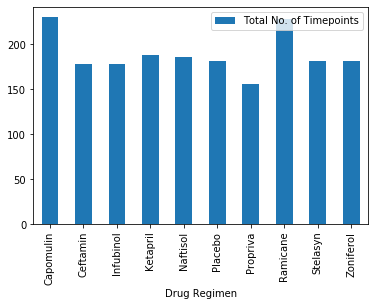

In [1756]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

total_timepoints_new_df = pd.DataFrame({"Drug Regimen":total_timepoints_df["Drug Regimen"], "Total No. of Timepoints":total_timepoints_df["Timepoint"]})
bar = total_timepoints_new_df.plot.bar(x='Drug Regimen', y='Total No. of Timepoints', rot=0)
plt.xticks(rotation=90)

In [1757]:
sex_mice_df= data_subset_df[["Mouse ID","Sex"]]
sex_mice_df.head()

,Mouse ID,Sex
0,k403,Male
1,k403,Male
2,k403,Male
3,k403,Male
4,k403,Male


In [1758]:
sex_mice_df.groupby(['Sex']).count()

,Mouse ID
Sex,
Female,930
Male,958


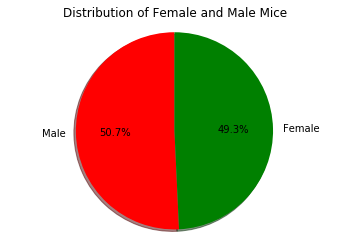

In [1759]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
name = ["Male", "Female"]
number = [958, 930]
colours = ["red", "green"]

plt.pie(number, labels=name, colors=colours, autopct="%1.1f%%", shadow=True, startangle=90, textprops={'color':"black"})
plt.title("Distribution of Female and Male Mice",color="black")
plt.axis("equal")
plt.savefig("Images/FemaleMaleMice.png")


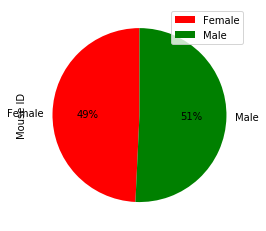

In [1760]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

colors=["red", "green"]
sex_mice_df.groupby(['Sex']).count().plot(kind='pie', y='Mouse ID', autopct='%1.0f%%', colors=colors, startangle=90)

## Quartiles, Outliers and Boxplots

In [1761]:
data_subset_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumour Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [1762]:
start_df= data_subset_df[["Drug Regimen","Mouse ID","Timepoint", "Tumour Volume (mm3)"]]
start_df.info

<bound method DataFrame.info of      Drug Regimen Mouse ID  Timepoint  Tumour Volume (mm3)
0        Ramicane     k403          0            45.000000
1        Ramicane     k403          5            38.825898
2        Ramicane     k403         10            35.014271
3        Ramicane     k403         15            34.223992
4        Ramicane     k403         20            32.997729
...           ...      ...        ...                  ...
1888     Naftisol     z969         25            63.145652
1889     Naftisol     z969         30            65.841013
1890     Naftisol     z969         35            69.176246
1891     Naftisol     z969         40            70.314904
1892     Naftisol     z969         45            73.867845

[1888 rows x 4 columns]>

In [1763]:
Capomulin_df = start_df.loc[start_df["Drug Regimen"] == "Capomulin", : ]
Capomulin_df

,Drug Regimen,Mouse ID,Timepoint,Tumour Volume (mm3)
10,Capomulin,s185,0,45.000000
11,Capomulin,s185,5,43.878496
12,Capomulin,s185,10,37.614948
13,Capomulin,s185,15,38.177232
14,Capomulin,s185,20,36.866876
...,...,...,...,...
440,Capomulin,i557,45,47.685963
1452,Capomulin,r157,0,45.000000
1453,Capomulin,r157,5,45.597064
1454,Capomulin,r157,10,46.059608


In [1764]:
Capomulin_mice_df = Capomulin_df[["Drug Regimen","Mouse ID","Timepoint", "Tumour Volume (mm3)"]]
Capomulin_mice_df

,Drug Regimen,Mouse ID,Timepoint,Tumour Volume (mm3)
10,Capomulin,s185,0,45.000000
11,Capomulin,s185,5,43.878496
12,Capomulin,s185,10,37.614948
13,Capomulin,s185,15,38.177232
14,Capomulin,s185,20,36.866876
...,...,...,...,...
440,Capomulin,i557,45,47.685963
1452,Capomulin,r157,0,45.000000
1453,Capomulin,r157,5,45.597064
1454,Capomulin,r157,10,46.059608


In [1765]:
Capomulin_mice_df["Mouse ID"].unique()

array(['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957',
       't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246',
       'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557',
       'r157'], dtype=object)

In [1766]:
Capomulin_mice_group_df = Capomulin_mice_df.groupby(["Mouse ID"]).last()
Capomulin_mice_group_df.reset_index(inplace=True)
Capomulin_mice_group_df

,Mouse ID,Drug Regimen,Timepoint,Tumour Volume (mm3)
0,b128,Capomulin,45,38.982878
1,b742,Capomulin,45,38.939633
2,f966,Capomulin,20,30.485985
3,g288,Capomulin,45,37.074024
4,g316,Capomulin,45,40.159220
5,i557,Capomulin,45,47.685963
6,i738,Capomulin,45,37.311846
7,j119,Capomulin,45,38.125164
8,j246,Capomulin,35,38.753265
9,l509,Capomulin,45,41.483008


In [1767]:
Ramicane_df = start_df.loc[start_df["Drug Regimen"] == "Ramicane", : ]
Ramicane_df

,Drug Regimen,Mouse ID,Timepoint,Tumour Volume (mm3)
0,Ramicane,k403,0,45.000000
1,Ramicane,k403,5,38.825898
2,Ramicane,k403,10,35.014271
3,Ramicane,k403,15,34.223992
4,Ramicane,k403,20,32.997729
...,...,...,...,...
449,Ramicane,w678,5,43.166373
450,Ramicane,y449,0,45.000000
451,Ramicane,y449,5,45.877545
452,Ramicane,y449,10,46.378092


In [1768]:
Ramicane_mice_df = Ramicane_df[["Drug Regimen","Mouse ID","Timepoint", "Tumour Volume (mm3)"]]
Ramicane_mice_df

,Drug Regimen,Mouse ID,Timepoint,Tumour Volume (mm3)
0,Ramicane,k403,0,45.000000
1,Ramicane,k403,5,38.825898
2,Ramicane,k403,10,35.014271
3,Ramicane,k403,15,34.223992
4,Ramicane,k403,20,32.997729
...,...,...,...,...
449,Ramicane,w678,5,43.166373
450,Ramicane,y449,0,45.000000
451,Ramicane,y449,5,45.877545
452,Ramicane,y449,10,46.378092


In [1769]:
Ramicane_mice_df["Mouse ID"].unique()

array(['k403', 'g791', 's508', 'm546', 'z578', 'j913', 'n364', 'c758',
       'a644', 'i177', 'j989', 'a520', 'r811', 'i334', 'q610', 'd251',
       'c458', 'a411', 'e662', 'u196', 'q597', 'a444', 'r921', 'w678',
       'y449'], dtype=object)

In [1770]:
Ramicane_mice_group_df = Ramicane_mice_df.groupby(["Mouse ID"]).last()
Ramicane_mice_group_df.reset_index(inplace=True)
Ramicane_mice_group_df

,Mouse ID,Drug Regimen,Timepoint,Tumour Volume (mm3)
0,a411,Ramicane,45,38.407618
1,a444,Ramicane,45,43.047543
2,a520,Ramicane,45,38.810366
3,a644,Ramicane,45,32.978522
4,c458,Ramicane,30,38.342008
5,c758,Ramicane,45,33.397653
6,d251,Ramicane,45,37.311236
7,e662,Ramicane,45,40.659006
8,g791,Ramicane,45,29.128472
9,i177,Ramicane,45,33.562402


In [1771]:
Infubinol_df = start_df.loc[start_df["Drug Regimen"] == "Infubinol", : ]
Infubinol_df

,Drug Regimen,Mouse ID,Timepoint,Tumour Volume (mm3)
454,Infubinol,a203,0,45.000000
455,Infubinol,a203,5,48.508468
456,Infubinol,a203,10,51.852437
457,Infubinol,a203,15,52.777870
458,Infubinol,a203,20,55.173336
...,...,...,...,...
1868,Infubinol,z581,25,54.316407
1869,Infubinol,z581,30,56.286750
1870,Infubinol,z581,35,58.628399
1871,Infubinol,z581,40,60.053740


In [1772]:
Infubinol_mice_df = Infubinol_df[["Drug Regimen","Mouse ID","Timepoint", "Tumour Volume (mm3)"]]
Infubinol_mice_df

,Drug Regimen,Mouse ID,Timepoint,Tumour Volume (mm3)
454,Infubinol,a203,0,45.000000
455,Infubinol,a203,5,48.508468
456,Infubinol,a203,10,51.852437
457,Infubinol,a203,15,52.777870
458,Infubinol,a203,20,55.173336
...,...,...,...,...
1868,Infubinol,z581,25,54.316407
1869,Infubinol,z581,30,56.286750
1870,Infubinol,z581,35,58.628399
1871,Infubinol,z581,40,60.053740


In [1773]:
Infubinol_mice_df["Mouse ID"].unique()

array(['a203', 'a251', 'a577', 'a685', 'c139', 'c326', 'c895', 'e476',
       'f345', 'i386', 'k483', 'k804', 'm756', 'n671', 'o809', 'o813',
       'q132', 's121', 'v339', 'v719', 'v766', 'w193', 'w584', 'y163',
       'z581'], dtype=object)

In [1774]:
Infubinol_mice_group_df = Infubinol_mice_df.groupby(["Mouse ID"]).last()
Infubinol_mice_group_df.reset_index(inplace=True)
Infubinol_mice_group_df

,Mouse ID,Drug Regimen,Timepoint,Tumour Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
2,a577,Infubinol,30,57.031862
3,a685,Infubinol,45,66.083066
4,c139,Infubinol,45,72.226731
5,c326,Infubinol,5,36.321346
6,c895,Infubinol,30,60.969711
7,e476,Infubinol,45,62.435404
8,f345,Infubinol,45,60.918767
9,i386,Infubinol,40,67.289621


In [1775]:
Ceftamin_df = start_df.loc[start_df["Drug Regimen"] == "Ceftamin", : ]
Ceftamin_df

,Drug Regimen,Mouse ID,Timepoint,Tumour Volume (mm3)
484,Ceftamin,a275,0,45.000000
485,Ceftamin,a275,5,46.795257
486,Ceftamin,a275,10,47.371343
487,Ceftamin,a275,15,49.734404
488,Ceftamin,a275,20,50.513437
...,...,...,...,...
1851,Ceftamin,y865,25,57.173538
1852,Ceftamin,y865,30,59.033275
1853,Ceftamin,y865,35,61.153140
1854,Ceftamin,y865,40,63.469549


In [1776]:
Ceftamin_mice_df = Ceftamin_df[["Drug Regimen","Mouse ID","Timepoint", "Tumour Volume (mm3)"]]
Ceftamin_mice_df

,Drug Regimen,Mouse ID,Timepoint,Tumour Volume (mm3)
484,Ceftamin,a275,0,45.000000
485,Ceftamin,a275,5,46.795257
486,Ceftamin,a275,10,47.371343
487,Ceftamin,a275,15,49.734404
488,Ceftamin,a275,20,50.513437
...,...,...,...,...
1851,Ceftamin,y865,25,57.173538
1852,Ceftamin,y865,30,59.033275
1853,Ceftamin,y865,35,61.153140
1854,Ceftamin,y865,40,63.469549


In [1777]:
Ceftamin_mice_df["Mouse ID"].unique()

array(['a275', 'b447', 'b487', 'b759', 'f436', 'h531', 'j296', 'k210',
       'l471', 'l490', 'l558', 'l661', 'l733', 'o287', 'p438', 'q483',
       't573', 'u149', 'u153', 'w151', 'x226', 'x581', 'x822', 'y769',
       'y865'], dtype=object)

In [1778]:
Ceftamin_mice_group_df = Ceftamin_mice_df.groupby(["Mouse ID"]).last()
Ceftamin_mice_group_df.reset_index(inplace=True)
Ceftamin_mice_group_df

,Mouse ID,Drug Regimen,Timepoint,Tumour Volume (mm3)
0,a275,Ceftamin,45,62.999356
1,b447,Ceftamin,0,45.000000
2,b487,Ceftamin,25,56.057749
3,b759,Ceftamin,30,55.742829
4,f436,Ceftamin,15,48.722078
5,h531,Ceftamin,5,47.784682
6,j296,Ceftamin,45,61.849023
7,k210,Ceftamin,45,68.923185
8,l471,Ceftamin,45,67.748662
9,l490,Ceftamin,30,57.918381


In [1779]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# max_tumour=data_subset_df.groupby(["Mouse ID"])["Timepoint"].max()
# max_tumour=max_tumour.reset_index()

# tumour_volume_last_timepoint_final_df = max_tumour.merge(data_subset_df, how="left", on=["Mouse ID","Timepoint"])
# tumour_volume_last_timepoint_final_df

tumour_volume_last_timepoint_df = pd.merge(Capomulin_mice_group_df,Ramicane_mice_group_df, how="outer", on=["Drug Regimen","Mouse ID","Timepoint", "Tumour Volume (mm3)"])
tumour_volume_last_timepoint_add_df = pd.merge(tumour_volume_last_timepoint_df,Infubinol_mice_group_df, how="outer", on=["Drug Regimen","Mouse ID","Timepoint", "Tumour Volume (mm3)"])
tumour_volume_last_timepoint_final_df = pd.merge(tumour_volume_last_timepoint_add_df,Ceftamin_mice_group_df, how="outer", on=["Drug Regimen","Mouse ID","Timepoint", "Tumour Volume (mm3)"])
# tumour_volume_last_timepoint_final_df.reset_index()

In [1780]:

# Merge this group df with the original dataframe to get the tumour volume at the last timepoint

# tumour_volume_last_timepoint_final_df


In [1781]:
# Put treatments into a list for for loop (and later for plot labels)

Treatment_Drug_Regimen = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumour vol data (for plotting)

Tumour_Volume_List = []

In [1782]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in Treatment_Drug_Regimen:

    # Locate the rows which contain mice on each drug and get the tumour volumes
    
    final_tumour_volume = tumour_volume_last_timepoint_final_df.loc[tumour_volume_last_timepoint_final_df["Drug Regimen"]== drug,"Tumour Volume (mm3)"]
    
    # add subset 
    
    Tumour_Volume_List.append(final_tumour_volume)
    
    # Determine outliers using upper and lower bounds

    quartiles = final_tumour_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    # print(f"The lower quartile of Tumour Volume is: {lowerq}")
    # print(f"The upper quartile of Tumour Volume is: {upperq}")
    # print(f"The interquartile range of Tumour Volume is: {iqr}")
    # print(f"The the median of Tumour Volume is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    # print(f"Values below {lower_bound} could be outliers.")
    # print(f"Values above {upper_bound} could be outliers.")

    outliers = final_tumour_volume.loc[(final_tumour_volume < lower_bound) | (final_tumour_volume > upper_bound)]
    outliers
    print(f"{drug}'s potential outliers:{outliers}")

Capomulin's potential outliers:Series([], Name: Tumour Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumour Volume (mm3), dtype: float64)
Infubinol's potential outliers:55    36.321346
Name: Tumour Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumour Volume (mm3), dtype: float64)


In [1783]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest

# temperature_df = pd.read_csv('../Resources/lax_temperature.csv')
# temperatures = temperature_df['HourlyDryBulbTemperature (C)']

# fig1, ax1 = plt.subplots()
# ax1.set_title('Temperatures at LAX')
# ax1.set_ylabel('Temperature (°C)')
# ax1.boxplot(temperatures)  name of list from previous exercise instead of temperatures
# plt.show()





# quartiles = temperatures.quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

# print(f"The lower quartile of temperatures is: {lowerq}")
# print(f"The upper quartile of temperatures is: {upperq}")
# print(f"The interquartile range of temperatures is: {iqr}")
# print(f"The the median of temperatures is: {quartiles[0.5]} ")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")


## Line and Scatter Plots

In [1784]:
Capomulin_mice_df["Mouse ID"].unique()

array(['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957',
       't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246',
       'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557',
       'r157'], dtype=object)

In [1785]:
Capomulin_mouse_df = Capomulin_mice_df.loc[Capomulin_mice_df["Mouse ID"] == "s185", : ]
Capomulin_mouse_df

,Drug Regimen,Mouse ID,Timepoint,Tumour Volume (mm3)
10,Capomulin,s185,0,45.000000
11,Capomulin,s185,5,43.878496
12,Capomulin,s185,10,37.614948
13,Capomulin,s185,15,38.177232
14,Capomulin,s185,20,36.866876
15,Capomulin,s185,25,33.949940
16,Capomulin,s185,30,32.959671
17,Capomulin,s185,35,28.328531
18,Capomulin,s185,40,25.472143
19,Capomulin,s185,45,23.343598


In [1786]:
list(Capomulin_mouse_df["Timepoint"])

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

In [1787]:
list(Capomulin_mouse_df["Tumour Volume (mm3)"])

[45.0,
 43.87849569,
 37.61494768,
 38.17723195,
 36.86687576,
 33.94994037,
 32.95967078,
 28.32853059,
 25.47214326,
 23.34359787]

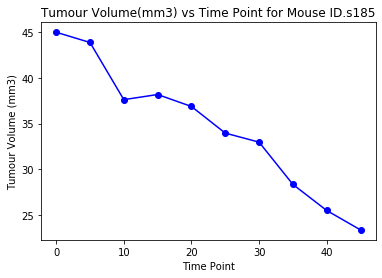

<Figure size 432x288 with 0 Axes>

In [1788]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
x_axis = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
y_axis = [45.0,43.87849569,37.61494768,38.17723195,36.86687576,33.94994037,32.95967078,28.32853059,25.47214326,23.34359787]

plt.plot(x_axis,y_axis,marker='o', color='blue', )
plt.xlabel("Time Point")
plt.ylabel("Tumour Volume (mm3)")
plt.title("Tumour Volume(mm3) vs Time Point for Mouse ID.s185")
plt.show()
plt.savefig("Images/LineMouseIDs185.png")

In [1789]:
starting_df= data_subset_df[["Drug Regimen","Mouse ID",'Weight (g)', "Tumour Volume (mm3)"]]
starting_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1888 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Drug Regimen         1888 non-null   object 
 1   Mouse ID             1888 non-null   object 
 2   Weight (g)           1888 non-null   int64  
 3   Tumour Volume (mm3)  1888 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 73.8+ KB


In [1790]:
Capomulin_new_df = starting_df.loc[starting_df["Drug Regimen"] == "Capomulin", : ]
Capomulin_new_df

,Drug Regimen,Mouse ID,Weight (g),Tumour Volume (mm3)
10,Capomulin,s185,17,45.000000
11,Capomulin,s185,17,43.878496
12,Capomulin,s185,17,37.614948
13,Capomulin,s185,17,38.177232
14,Capomulin,s185,17,36.866876
...,...,...,...,...
440,Capomulin,i557,24,47.685963
1452,Capomulin,r157,25,45.000000
1453,Capomulin,r157,25,45.597064
1454,Capomulin,r157,25,46.059608


In [1791]:
Capomulin_new_df.columns

Index(['Drug Regimen', 'Mouse ID', 'Weight (g)', 'Tumour Volume (mm3)'], dtype='object')

In [1792]:
# Capomulin_weight_group_df = Capomulin_new_df.groupby(["Weight (g)"])
Capomulin_weight_group_df = Capomulin_new_df.groupby(["Mouse ID","Weight (g)"])
Capomulin_weight_group_df

In [1793]:
Capomulin_weight_mean_tumour_volume_group = Capomulin_weight_group_df["Tumour Volume (mm3)"].mean()
Capomulin_weight_mean_tumour_volume_group

Mouse ID  Weight (g)
b128      22            41.963636
b742      21            40.083699
f966      17            36.505973
g288      19            41.990097
g316      22            44.613344
i557      24            44.805810
i738      20            39.141053
j119      23            44.465236
j246      21            43.216925
l509      21            44.434474
l897      19            42.507261
m601      17            34.847470
m957      19            39.049816
r157      25            45.798970
r554      17            36.509212
r944      25            43.367364
s185      17            34.559143
s710      23            42.803733
t565      17            39.328725
u364      17            39.887495
v923      21            41.581595
w150      23            41.384825
w914      21            41.352452
x401      15            36.182040
y793      17            38.506829
Name: Tumour Volume (mm3), dtype: float64

In [1794]:
Capomulin_weight_mean_tumour_volume_group_df=pd.DataFrame(Capomulin_weight_mean_tumour_volume_group)
Capomulin_weight_mean_tumour_volume_group_df.reset_index(inplace=True)
Capomulin_weight_mean_tumour_volume_group_df

,Mouse ID,Weight (g),Tumour Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344
5,i557,24,44.805810
6,i738,20,39.141053
7,j119,23,44.465236
8,j246,21,43.216925
9,l509,21,44.434474


In [1795]:
weight = list(Capomulin_weight_mean_tumour_volume_group_df["Weight (g)"])
weight


[22,
 21,
 17,
 19,
 22,
 24,
 20,
 23,
 21,
 21,
 19,
 17,
 19,
 25,
 17,
 25,
 17,
 23,
 17,
 17,
 21,
 23,
 21,
 15,
 17]

In [1796]:
mean_tumour_volume =list(Capomulin_weight_mean_tumour_volume_group_df["Tumour Volume (mm3)"])
mean_tumour_volume

[41.963635634,
 40.083699304,
 36.50597276,
 41.990096605999994,
 44.613343896,
 44.80580968499999,
 39.14105275,
 44.465236345,
 43.21692460875,
 44.43447379,
 42.507261035000006,
 34.847469897,
 39.049816448,
 45.798969507500004,
 36.509212046,
 43.36736445299999,
 34.559143395,
 42.80373304399999,
 39.328725099,
 39.887495191,
 41.58159510099999,
 41.384825209999995,
 41.352452281,
 36.182039562,
 38.506829248]

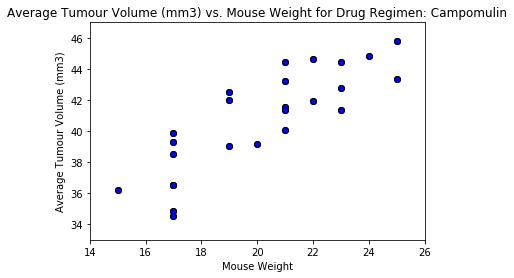

In [1797]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
x_axis=[weight]
y_axis=[mean_tumour_volume]

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")

plt.ylim(33,47)
plt.xlim(14,26)
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.title("Average Tumour Volume (mm3) vs. Mouse Weight for Drug Regimen: Campomulin")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumour Volume (mm3)")
plt.savefig("Images/ScatterWeightTumourVolume.png")
plt.show()


## Correlation and Regression

In [1798]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen

In [1799]:
Capomulin_weight_mean_tumour_volume_group_df

,Mouse ID,Weight (g),Tumour Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344
5,i557,24,44.805810
6,i738,20,39.141053
7,j119,23,44.465236
8,j246,21,43.216925
9,l509,21,44.434474


In [1800]:
mouse_weight = Capomulin_weight_mean_tumour_volume_group_df.iloc[:,1]
average_tumour_volume = Capomulin_weight_mean_tumour_volume_group_df.iloc[:,2]
correlation = st.pearsonr(mouse_weight,average_tumour_volume)
print(f"The correlation between Mouse Weight (g) and Average Tumour Volume (mm3) is {round(correlation[0],2)}")

The correlation between Mouse Weight (g) and Average Tumour Volume (mm3) is 0.84


The r-squared is: 0.7088568047708721


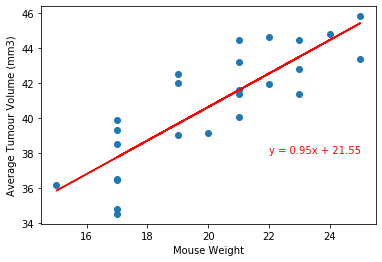

In [1801]:
x_values = (mouse_weight)
y_values = (average_tumour_volume)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(22,38),color="red")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumour Volume (mm3)")
print(f"The r-squared is: {rvalue**2}")
plt.show()